<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import math

m = 1000
n = 3
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([-5.44,  8.45, -6.75, -7.07, -9.37,  8.37,  9.08, -5.26, -7.94,
       -1.35, -5.53,  9.74, -9.97, -5.17,  4.23, -3.16,  7.33,  0.95,
       -9.56,  6.82,  1.78,  7.17,  3.33, -1.25, -2.46, -1.9 , -1.32,
        6.68,  0.69, -6.66, -6.27,  0.15,  5.26,  5.22, -8.29, -6.81,
        9.43,  8.4 , -1.12, -9.94, -1.56,  5.  , -6.49,  7.18,  2.41,
       -7.41,  0.44, -7.39,  7.41,  7.1 ,  0.51, -3.99,  9.67, -2.96,
        8.19,  5.95, -8.69, -0.68, -5.62, -0.07, -6.48,  9.49, -6.44,
        6.35, -5.54, -3.34,  8.59,  1.32,  1.  ,  3.5 , -6.6 , -7.73,
       -7.51,  9.36, -8.47,  6.07, -4.84,  9.92,  1.15, -7.39,  3.41,
        4.56, -6.31, -8.31, -1.47,  2.76, -8.44,  6.26,  3.49, -4.89,
        9.23, -0.3 ,  3.47,  1.08, -0.17, -4.36,  4.63,  7.2 , -0.8 ,
        5.65, -3.86,  6.77, -9.13, -2.  , -6.  ,  6.23, -8.07, -8.56,
       -8.76,  0.94,  2.28, -8.03, -6.11,  5.55,  5.06,  0.96,  0.88,
       -8.2 ,  4.91,  5.83, -4.46,  3.95, -4.43, -0.88, -6.97, -5.55,
       -6.98,  1.01,

In [ ]:
#x = np.random.randint(1,20, n)
x=[1,1,1] # x fijo
print(x)

[1, 1, 1]


In [ ]:
def f(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return np.log(totalsum)
f(x)


29.960085514808522

In [ ]:
def fsinLog(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return totalsum
fsinLog(x)

10268329976426.256

In [ ]:
def fdx(x):
    # print(x)
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j+1
        aux2 = math.exp(totalexp)*a.item(i-1,0)
        #print(aux2)
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,1)
        #print(aux2)

        totalsum2 = totalsum2 + aux2
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2])

print(fdx(x))

[4.72997401 7.47614614]


In [ ]:
def fdx3(x):
    # print(x)
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j+1
        aux2 = math.exp(totalexp)*a.item(i-1,0)
        #print(aux2)
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,1)
        #print(aux2)

        totalsum2 = totalsum2 + aux2
        # print(totalsum)
        i = i + 1
      
    i = 1
    totalsum3 = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,2)
        #print(aux2)

        totalsum3 = totalsum3 + aux2
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2, (1/fsinLog(x))*totalsum3])

print(fdx3(x))

[6.43725479 8.28719194 8.81614676]


In [ ]:

def backtrack4(x0, f, fdx, t = 1, alpha = 0.2, beta = 0.3):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
        #  print(t)
    return t

backtrack4(x, f, fdx3)

NameError: ignored

In [ ]:
backtrack4([0.1,0.5],f,fdx)

0.0984770902183612

In [131]:
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.0001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0),t, iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

grad(x, 50)

[0.5270026  0.25238539] 22.739167315092793 [4.35341343 4.15701025] 0.1 1
[ 0.17437611 -0.08433244] 21.505863367986397 [ 2.14198791 -3.64259765] 0.08100000000000002 2
[0.09139111 0.05678925] 21.197788566842572 [-0.93500991  0.46296579] 0.03874204890000002 3
[0.12073271 0.0422609 ] 21.18368255479681 [ 0.07683033 -0.21220065] 0.03138105960900001 4
[0.1180538  0.04965987] 21.182905800078807 [-0.07096607  0.00426387] 0.03486784401000002 5
[0.12080318 0.04949468] 21.182820750190178 [ 0.00758051 -0.02702585] 0.03874204890000002 6
[0.12050949 0.05054172] 21.182808477913564 [-0.01082892  0.00266879] 0.03874204890000002 7
[0.12088707 0.05044866] 21.18280658305905 [ 0.00060911 -0.00339731] 0.03486784401000002 8
[0.12086347 0.05058028] 21.182806381445896 [-0.00133098  0.00020422] 0.03874204890000002 9
[0.12091504 0.05057237] 21.182806353031406 [ 0.00018334 -0.00050075] 0.03874204890000002 10
[0.12090865 0.05058983] 21.182806348677403 [-1.64884581e-04  8.77106881e-06] 0.03486784401000002 11
[0.1209

(array([0.12091503, 0.05058949]), 21.18280634821242, 13)

In [ ]:
x00= np.arange(-1, 1, 0.01)
#print(x0)
y=[]
for i in x00:
    y.append(f([-0.019501,i]))
    #print(f([0.1,i]))

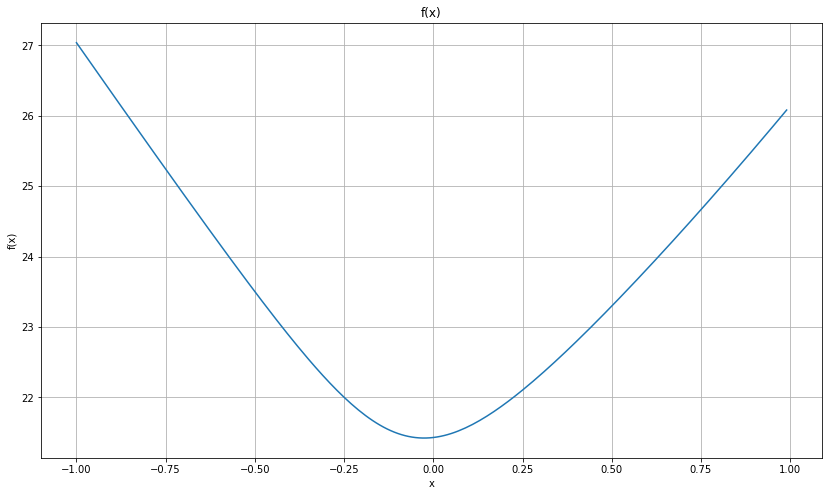

por evaluaciónes: 21.421389752882714
por optimización: 21.428671943101907


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(x00,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print("por evaluaciónes: "+str(min(y)))
print("por optimización: "+str(f([-0.019501 , -0.0005068])))

In [ ]:
def Hessian(x0,fdx): #punto y derivada
  dt=0.000001
  dxdx=( fdx( [ x0[0]+dt , x0[1] ] )[0] - fdx(x0)[0] ) / dt
  dxdy=( fdx( [ x0[0]+dt , x0[1] ] )[1] - fdx(x0)[1] ) / dt
  dydx=( fdx( [ x0[0] , x0[1]+dt ] )[0] - fdx(x0)[0] ) / dt
  dydy=( fdx( [ x0[0] , x0[1]+dt ] )[1] - fdx(x0)[1] ) / dt
  return[[dxdx,dxdy],[dydx,dydy]]

In [142]:
 def backtrack5(x0, f, fdx, t = 1, alpha = 0.2, beta = 0.25):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,-fdx)) > f(point) + alpha * t * (np.dot(np.transpose(-fdx), 1*fdx)):
      t *= beta
      #print(f(point - np.dot(t,fdx)))
    return t

In [143]:
import numpy.linalg as npla
##################################################
x=[1,1]  #Método de newton siempre parte de [1,1]
######################################################

def lambda_sq(fdx, Hessian, point):
    lambda_sq1 = np.dot(fdx(point).T, np.dot(npla.pinv( Hessian(point,fdx) ) , fdx(point)  )) 
    return lambda_sq1.item() 
     
def delta_x(fdx, Hessian, point):
    delta_x =- np.dot(npla.pinv(Hessian(point,fdx)) , fdx(point))
    return np.array(delta_x)

#eps is the tolerance condition to exit out of the while loop
def newtons_method(x, eps=0.0001, max_iters=20):
    iters = 1
    lmb_sq = lambda_sq(fdx, Hessian, x)
    #In while loop we are checking the magnitude of Newton's decrement. If it's below tolerance we exit out.
    #t=0.0001
    print(x, f(x), fdx(x), 0, iters)
    while(( ((lmb_sq))**2/2.0) > eps):
        dlt_x = delta_x(fdx, Hessian, x) # paso
        lmb_sq = lambda_sq(fdx, Hessian, x)  #decremento
        #print(fdx(x))
        #print(dlt_x)
        #Line search for stepsize
        #t = backtrack4(x, f, fdx, 0.2, 0.25)
        #t=0.05
        t =backtrack5(x, f, dlt_x)
        #print(t)
        # Update x
        #t = backtrack4(x, f, fdx) #0.2 0.25
        #print(t)
        #print(np.array((x + np.dot(t , dlt_x))))
        #t=0.05
        #if(iters<3):
        #  t=0.05  #primer paso pequeño para no saltar tanto
        x = np.array((x + np.dot(t , dlt_x)))

        #t = backtrack4(x, f, fdx, 0.2, 0.25)
        #print(t,x)
        # Update lmb_sq, see if we still stay in the loop
        #print(dlt_x, fdx(x))
        #print(lmb_sq) 
        print(x, f(x), fdx(x), t, iters)
        iters = 1 + iters  
        if(iters > max_iters):
            break
    return x, f(x), iters
#Test
newtons_method(x)

[1, 1] 29.960085514808522 [4.72997401 7.47614614] 0 1
[-0.03901127 -0.0641602 ] 21.496480164121323 [-3.26245112 -0.58957927] 0.0625 1
[0.1598658  0.09992632] 21.217902182327215 [0.64853364 0.93869747] 1 2
[0.12298899 0.05305285] 21.182894343496088 [0.03393473 0.04300704] 1 3
[0.12092232 0.05060116] 21.182806349262545 [0.0001059  0.00016575] 1 4


(array([0.12092232, 0.05060116]), 21.182806349262545, 5)

In [ ]:
xx=[2,2]
lambda_sq(fdx, Hessian, xx)
dlt_x = delta_x(fdx, Hessian, xx)
print(dlt_x)
print(xx + dlt_x)
t=2
np.array((xx + np.dot(t , dlt_x)))
print(np.array((xx + np.dot(t , dlt_x))))

[-132.25525835 -248.37750716]
[-130.25525835 -246.37750716]
[-262.5105167  -494.75501432]


In [ ]:
Hessian([1,1],fdx)

In [ ]:
newtons_method([1,1])

(array([0.56718975, 0.62481681]), 25.313336066132692, 4)